In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# 10 цифр
num_classes = 10
input_shape = (28, 28, 1)
# качаем картинки, метки, картинки для теста, метки для теста
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Картинки представляют собой чб изображения. Каждый пиксель может быть от черного(0) жо белого(255). Лучше промасштабировать это значение от 0 до 1, так нейронной сети будет лучше
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
# Изображения кодируются массивом 28 на 28 на 1. Да, массив из одного элемента в конце. 
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
# Преобразовывем метку(0..9) в массив унитарных кодов. 4 = [0,0,0,0,1,0,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
#Слоёный пирог из слоев сети. В данном примере это сверточная сеть. 2 слоя свертки. Даже дропаут есть. 
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # количество и размер сверточных слоев
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 17s 39ms/step - loss: 0.7658 - accuracy: 0.7615 - val_loss: 0.0752 - val_accuracy: 0.9800
Epoch 2/15
422/422 [==============================] - 16s 38ms/step - loss: 0.1112 - accuracy: 0.9664 - val_loss: 0.0547 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0820 - accuracy: 0.9744 - val_loss: 0.0456 - val_accuracy: 0.9893
Epoch 4/15
422/422 [==============================] - 17s 40ms/step - loss: 0.0718 - accuracy: 0.9774 - val_loss: 0.0447 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0398 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.0359 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.0335 - val_accuracy:

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025110341608524323
Test accuracy: 0.9916999936103821


In [7]:
import matplotlib.pyplot as plt
# покажу примеры, на которых натренированная сеть путается. Я тоже не сильно лучше сети распознаю некоторые изображения
i = 0
for n in range(len(x_test)):
    a = model.predict(x_test[n:n+1])
    x = np.argmax(a)
    y = np.argmax(y_test[n])
    if (x != y):
        plt.figure()
        plt.imshow(x_test[n], cmap='gray')
        plt.text(1,2, f"pred %d" % (x),backgroundcolor="white")
        plt.text(1,4, f"real %d" % (y),backgroundcolor="white")
        i += 1
        if (i > 3):  
            break

NameError: name 'model' is not defined

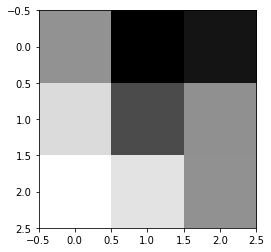

In [7]:
# Пример сверточного нейрона. 
np.shape(model.get_weights()[2])
m = model.get_weights()[0]
dim = 3
sv = [[m[i][j][0] for j in range(dim)] for i in range(dim)]
p1 = [[sv[i][j][6] for j in range(dim)] for i in range(dim)]
plt.imshow(p1, cmap='gray')

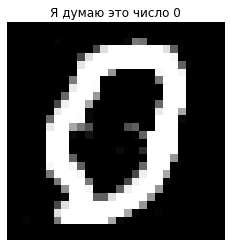

In [8]:
from matplotlib import image
# Тут можно посмотреть как работает сеть с изображениями из папки
img_source = image.imread('data/image1.jpg') # 28 * 28 
img = img_source.astype(np.float32)
img = [[ [img[i][j][0] + img[i][j][1] + img[i][j][2]] for j in range(28)] for i in range(28)] 
n = np.array([img]) / (255*3)
pred = np.argmax(model.predict(n))
plt.imshow(img_source)
plt.title(f"Я думаю это число %d" % (pred))
plt.axis('off')
plt.show()

In [9]:
model.save("model.h5")

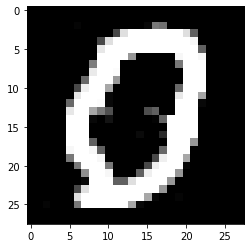

In [63]:
from PIL import Image
img_source = Image.open('static/image0.jpg')
#img = image.astype(np.float32) / 255
#img_source.thumbnail((28, 28), Image.ANTIALIAS)
img_source = img_source.resize((28,28))
plt.imshow(img_source)

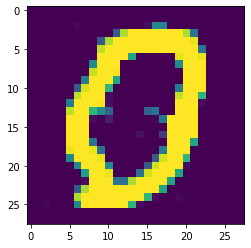

In [81]:
img = np.array([[img_source.getdata()[(i*28 + j)][0] + img_source.getdata()[(i*28 + j)][1] + img_source.getdata()[(i*28 + j)][2]
  for j in range(28)] for i in range(28)]) / (3 * 255)
plt.imshow(img)

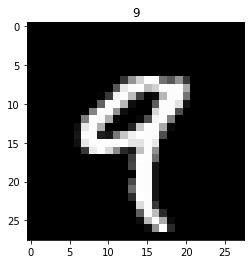

In [16]:
n = 
plt.title(np.argmax(y_train[n]))
plt.imshow(x_train[n], cmap='gray')

In [19]:
import urllib

In [21]:
data = 'data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUAAAhwAAAFoCAYAAAA'
response = urllib.request.urlopen(data)

Error: Incorrect padding